# Statistical Analysis for Income Data

Author: Mostafa Hadavand   
Date: 2018-03-03

This notebook presents an example data exploration for CSD income data that can be downloaded from the following link.

[Income Data](http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page_Download-Telecharger.cfm?Lang=E&Tab=1&Geo1=CMACA&Code1=835&Geo2=PR&Code2=01&Data=Count&SearchText=Edmonton&SearchType=Begins&SearchPR=01&B1=Income&TABID=1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%reload_ext autoreload
%autoreload 2

%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Load the data

In [2]:
df_CSD = pd.read_csv('Data/Census2016_AB_CSD.csv',encoding='latin1')
df_CSD.head()

,CENSUS_YEAR,GEO_CODE,GEO_LEVEL,GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,CSD_TYPE_NAME,ALT_GEO_CODE,Dimension,Member_ID,Notes,Total,Male,Female
0,2016,4801003,3,Cypress County,4.3,5.6,0,MD,4801003,"Population, 2016 (1)",1,1.0,7662,...,...
1,2016,4801003,3,Cypress County,4.3,5.6,0,MD,4801003,"Population, 2011 (2)",2,2.0,7214,...,...
2,2016,4801003,3,Cypress County,4.3,5.6,0,MD,4801003,"Population percentage change, 2011 to 2016",3,NaN,6.2,...,...
3,2016,4801003,3,Cypress County,4.3,5.6,0,MD,4801003,Total private dwellings (3),4,3.0,3222,...,...
4,2016,4801003,3,Cypress County,4.3,5.6,0,MD,4801003,Private dwellings occupied by usual residents (4),5,4.0,2689,...,...


### Check the Member_IDs corresponding to median values

In [3]:
df_CSD[['Dimension','Member_ID','Total']][df_CSD['Dimension'].str.match('Median')]\
.groupby(['Dimension','Member_ID']).count()

,,Total
Dimension,Member_ID,
Median after-tax income in 2015 among recipients ($),665,425
Median after-tax income in 2015 for persons aged 15 years and over not in economic families ($) (51),830,425
Median after-tax income of couple economic families with children in 2015 ($),810,425
Median after-tax income of couple economic families without children or other relatives in 2015 ($),806,425
Median after-tax income of economic families in 2015 ($),802,425
Median after-tax income of households in 2015 ($),743,425
Median after-tax income of lone-parent economic families in 2015 ($),814,425
Median after-tax income of one-person households in 2015 ($),746,425
Median after-tax income of two-or-more-person households in 2015 ($),749,425


### Check Spatial Data

The corresponding shape file is loaded to study the Census Subdivisions. It is required to install geopandas.

In [4]:
import geopandas as gpd
shp = 'Data/Alberta_CSD2016/Alberta_CSD2016.shp'
df_spatial = gpd.read_file(shp)
df_spatial.head()

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,...,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,Shape_Leng,Shape_Area,geometry
0,4815023,Canmore,T,48,Alberta,4815,Division No. 15,CDR,4815015,Bighorn No. 8,...,Banff--Jasper--Rocky Mountain House,828,3,828,48828,Canmore,D,65444.606318,6.938296e+07,"POLYGON ((470559.3832999999 5662470.932800001,..."
1,4815027,Ghost Lake,SV,48,Alberta,4815,Division No. 15,CDR,4815015,Bighorn No. 8,...,Banff--Jasper--Rocky Mountain House,999,7,None,None,None,None,5207.421246,6.681321e+05,"POLYGON ((516587.8195000002 5671021.1709, 5173..."
2,4812808,White Fish Lake 128,IRI,48,Alberta,4812,Division No. 12,CDR,4812014,St. Paul County No. 19,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,58687.129982,6.111809e+07,"POLYGON ((706392.4102999996 6025299.4767, 7076..."
3,4812810,Cold Lake 149,IRI,48,Alberta,4812,Division No. 12,CDR,4812004,Bonnyville No. 87,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,48773.548098,1.473223e+08,"POLYGON ((808718.5225999998 6031058.0693, 8089..."
4,4812811,Kehewin 123,IRI,48,Alberta,4812,Division No. 12,CDR,4812004,Bonnyville No. 87,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,48449.061245,8.484803e+07,"POLYGON ((769856.7632999998 6006472.9333, 7698..."


In [5]:
df_spatial_AB = df_spatial[df_spatial.PRUID=='48']
print('Total Census Subdivision = %i'%(len(df_spatial_AB)))
df_spatial_AB['CSDUID']=df_spatial_AB['CSDUID'].astype(int)
df_spatial_AB.head()

Total Census Subdivision = 425


,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,...,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,Shape_Leng,Shape_Area,geometry
0,4815023,Canmore,T,48,Alberta,4815,Division No. 15,CDR,4815015,Bighorn No. 8,...,Banff--Jasper--Rocky Mountain House,828,3,828,48828,Canmore,D,65444.606318,6.938296e+07,"POLYGON ((470559.3832999999 5662470.932800001,..."
1,4815027,Ghost Lake,SV,48,Alberta,4815,Division No. 15,CDR,4815015,Bighorn No. 8,...,Banff--Jasper--Rocky Mountain House,999,7,None,None,None,None,5207.421246,6.681321e+05,"POLYGON ((516587.8195000002 5671021.1709, 5173..."
2,4812808,White Fish Lake 128,IRI,48,Alberta,4812,Division No. 12,CDR,4812014,St. Paul County No. 19,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,58687.129982,6.111809e+07,"POLYGON ((706392.4102999996 6025299.4767, 7076..."
3,4812810,Cold Lake 149,IRI,48,Alberta,4812,Division No. 12,CDR,4812004,Bonnyville No. 87,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,48773.548098,1.473223e+08,"POLYGON ((808718.5225999998 6031058.0693, 8089..."
4,4812811,Kehewin 123,IRI,48,Alberta,4812,Division No. 12,CDR,4812004,Bonnyville No. 87,...,Wood Buffalo--Cold Lake,997,5,None,None,None,None,48449.061245,8.484803e+07,"POLYGON ((769856.7632999998 6006472.9333, 7698..."


## Extract Median Data

### Choose a Subset 
df_663 is a subset of data that contains data for median total income in 2015 among recipients.

In [6]:
for item in np.unique(df_CSD[['Dimension']][df_CSD['Member_ID']==663]):
    print(item)

Median total income in 2015 among recipients ($)


In [7]:
df_663 = df_CSD[['GEO_CODE', 'GEO_NAME', 'Total', 'Male', 'Female', 'Member_ID']][df_CSD['Member_ID']==663]
df_663.head()

,GEO_CODE,GEO_NAME,Total,Male,Female,Member_ID
662,4801003,Cypress County,41920,55488,30816,663
2909,4801006,Medicine Hat,36819,49477,28395,663
5156,4801008,Forty Mile County No. 8,35547,44608,25626,663
7403,4801009,Foremost,44096,60608,29824,663
9650,4801014,Bow Island,32064,46592,21056,663


#### Data quality check

Check if all the rows contain a numeric value

In [8]:
df_663[df_663.Total.apply(lambda x: not x.isnumeric())].head()

,GEO_CODE,GEO_NAME,Total,Male,Female,Member_ID
16391,4802002,Coutts,x,x,x,663
68072,4803003,Improvement District No. 4 Waterton,x,x,x,663
74813,4803008,Hill Spring,x,x,x,663
81554,4803016,Cowley,x,x,x,663
101777,4803803,Blood 148A,x,x,x,663


In [9]:
np.unique(df_663['Total'][df_663.Total.apply(lambda x: not x.isnumeric())])

array(['..', 'F', 'x'], dtype=object)

In [10]:
df_663_trim = df_663[df_663.Total.apply(lambda x: x.isnumeric())]
df_663_trim.reset_index(drop=True, inplace=True)
df_663_trim[['Total', 'Male', 'Female']] = df_663_trim[['Total', 'Male', 'Female']].astype(float)
df_663_trim.head()

,GEO_CODE,GEO_NAME,Total,Male,Female,Member_ID
0,4801003,Cypress County,41920.0,55488.0,30816.0,663
1,4801006,Medicine Hat,36819.0,49477.0,28395.0,663
2,4801008,Forty Mile County No. 8,35547.0,44608.0,25626.0,663
3,4801009,Foremost,44096.0,60608.0,29824.0,663
4,4801014,Bow Island,32064.0,46592.0,21056.0,663


### Alternatives for histogram plot

#### Using pandas built-in plot

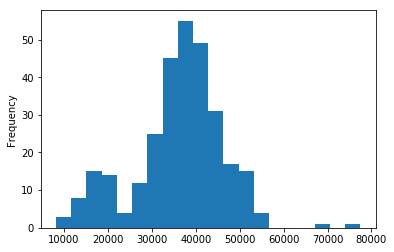

In [11]:
df_663_trim.Total.plot.hist(bins=20)

#### Using matplotlib

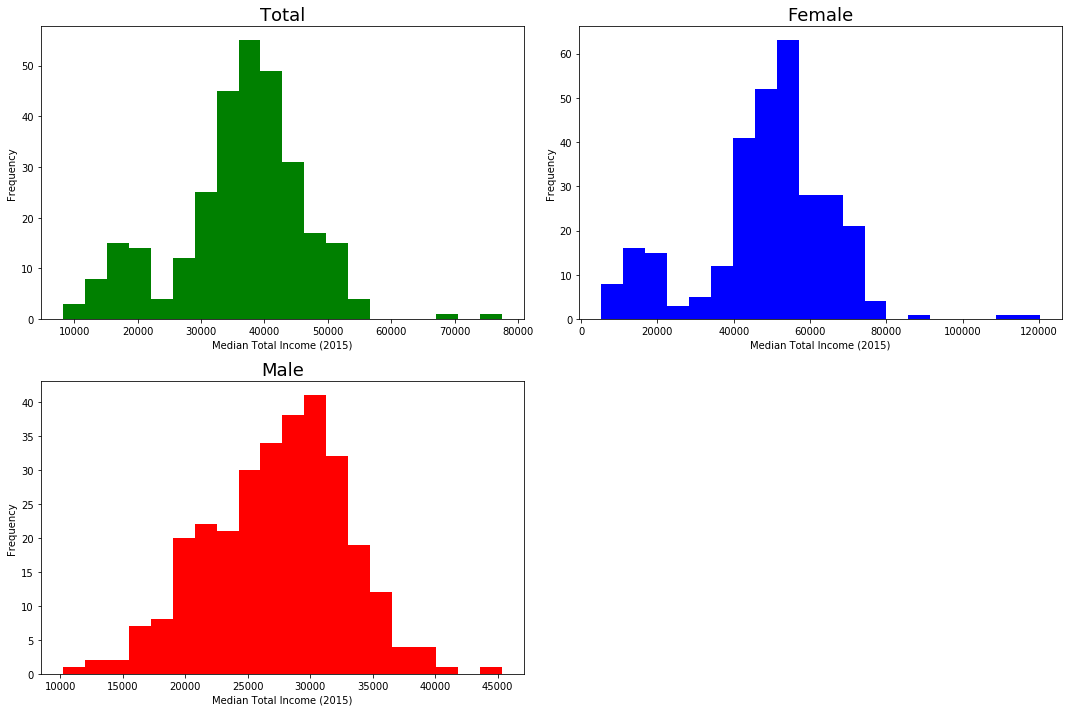

In [12]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(221)
hist1 = ax.hist(df_663_trim['Total'], bins=20, color='green')
ax.set_title('Total', fontsize=18); ax.set_xlabel('Median Total Income (2015)'); ax.set_ylabel('Frequency')

ax = fig.add_subplot(222)
hist2 = ax.hist(df_663_trim['Male'], bins=20, color='blue')
ax.set_title('Female', fontsize=18); ax.set_xlabel('Median Total Income (2015)'); ax.set_ylabel('Frequency')

ax = fig.add_subplot(223)
hist3 = ax.hist(df_663_trim['Female'], bins=20, color='red')
ax.set_title('Male', fontsize=18); ax.set_xlabel('Median Total Income (2015)'); ax.set_ylabel('Frequency')

plt.tight_layout()

#### Using Bokeh

In [13]:
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg as df
output_notebook()

Loading BokehJS ...

In [14]:
# Histogram Total
p1 = figure(title="Histogram (Total)",tools="pan,wheel_zoom,box_zoom,reset,save", background_fill_color="#D0D3D4")
hist, edges = np.histogram(df_663_trim.Total, density=False, bins=20)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="green", line_color="#033649")

# Histogram Male
p2 = figure(title="Histogram (Male)",tools="pan,wheel_zoom,box_zoom,reset", background_fill_color="#D0D3D4")
hist, edges = np.histogram(df_663_trim.Male, density=False, bins=20)
p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="blue", line_color="#033649")

# Histogram Female
p3 = figure(title="Histogram (Female)",tools="pan,wheel_zoom,box_zoom,reset", background_fill_color="#D0D3D4")
hist, edges = np.histogram(df_663_trim.Female, density=False, bins=20)
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="red", line_color="#033649")

show(gridplot(p1,p2,p3, ncols=2, plot_width=400, plot_height=400, toolbar_location='right'))

#### Custom Plots

In [15]:
import PythonTools as PT

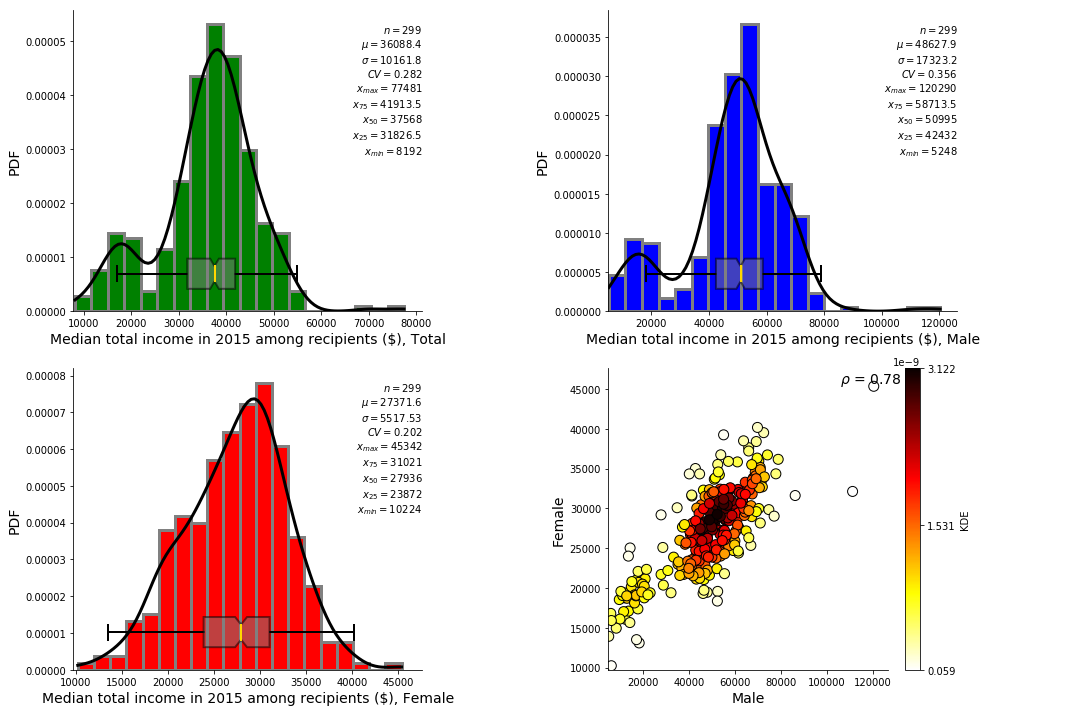

In [16]:
fig = plt.figure(figsize=(15,10))

main_title = df_CSD['Dimension'][df_CSD.Member_ID==663].as_matrix()[0]

ax = fig.add_subplot(221)
PT.pdf_plot(df_663_trim['Total'], bw=-1, ax=ax, line_color='gray', labelfont=14,
            xlabel=main_title+', Total', barcolor='green', kde_color='black')

ax = fig.add_subplot(222)
PT.pdf_plot(df_663_trim['Male'], bw=-1, ax=ax, line_color='gray',labelfont=14,
            xlabel=main_title+', Male', barcolor='blue', kde_color='black')

ax = fig.add_subplot(223)
PT.pdf_plot(df_663_trim['Female'], bw=-1, ax=ax, line_color='gray',labelfont=14,
            xlabel=main_title+', Female', barcolor='red', kde_color='black')

ax = fig.add_subplot(224)
PT.bv_plot(df_663_trim['Male'],df_663_trim['Female'],bw=-1, ax=ax, 
           xlabel='Male', label_font_size= 14,
           ylabel='Female', fontsize=14)

plt.tight_layout()

### Location Map

In [17]:
df_663_trim_spatial = df_spatial_AB.merge(df_663_trim, how='inner', left_on='CSDUID',
                                          right_on='GEO_CODE',suffixes=('_x', '_y'))

In [18]:
print('The total numbee of census subdivision with data: %i'%(len(df_663_trim_spatial)))

The total numbee of census subdivision with data: 299


Text(0.5,1,'Female')

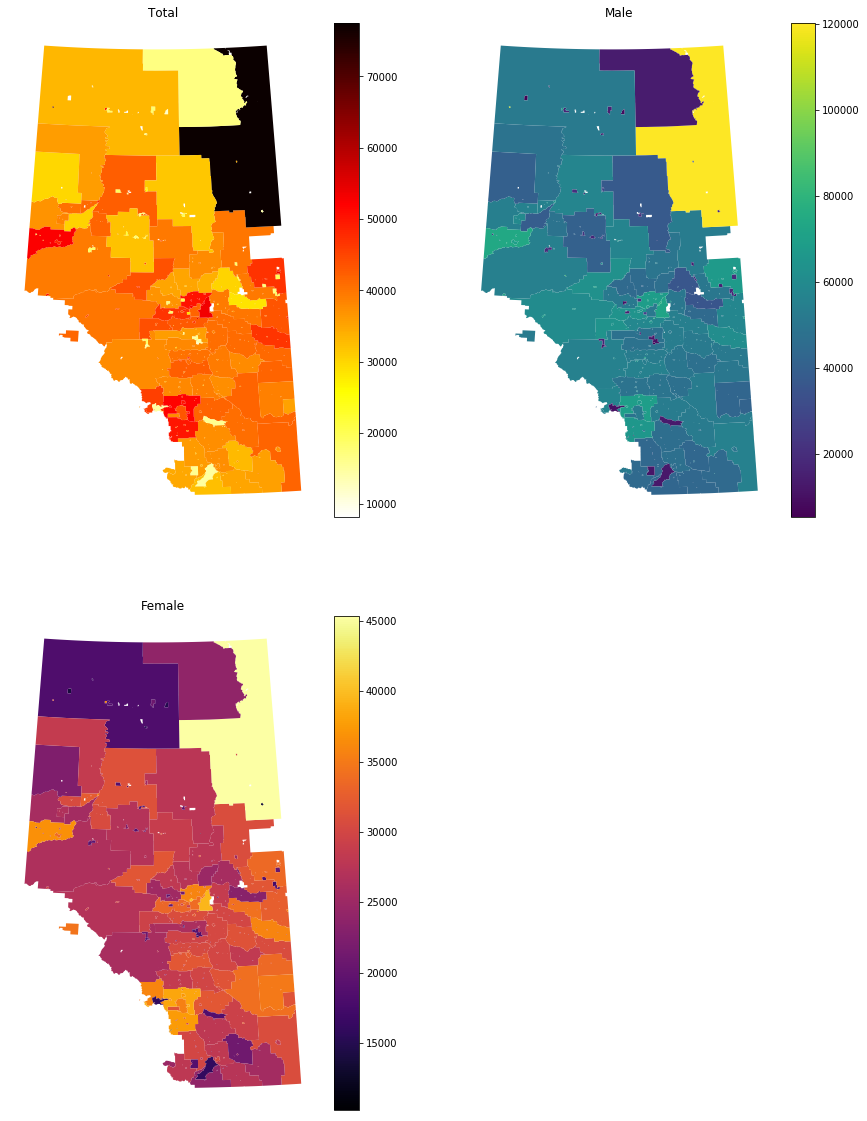

In [19]:
fig = plt.figure(figsize=(15,20))

ax = fig.add_subplot(221)
df_663_trim_spatial.plot(column='Total', cmap='hot_r',ax=ax, legend=True)
ax.set_frame_on(False); ax.axes.get_yaxis().set_visible(False); ax.axes.get_xaxis().set_visible(False)
ax.set_title('Total')

ax = fig.add_subplot(222)
df_663_trim_spatial.plot(column='Male', cmap='viridis',ax=ax, legend=True)
ax.set_frame_on(False); ax.axes.get_yaxis().set_visible(False); ax.axes.get_xaxis().set_visible(False)
ax.set_title('Male')

ax = fig.add_subplot(223)
df_663_trim_spatial.plot(column='Female', cmap='inferno',ax=ax, legend=True)
ax.set_frame_on(False); ax.axes.get_yaxis().set_visible(False); ax.axes.get_xaxis().set_visible(False)
ax.set_title('Female')

## Consider writing a wrapper (repeatability)

In [24]:
from Accessories import summary_stat as ss

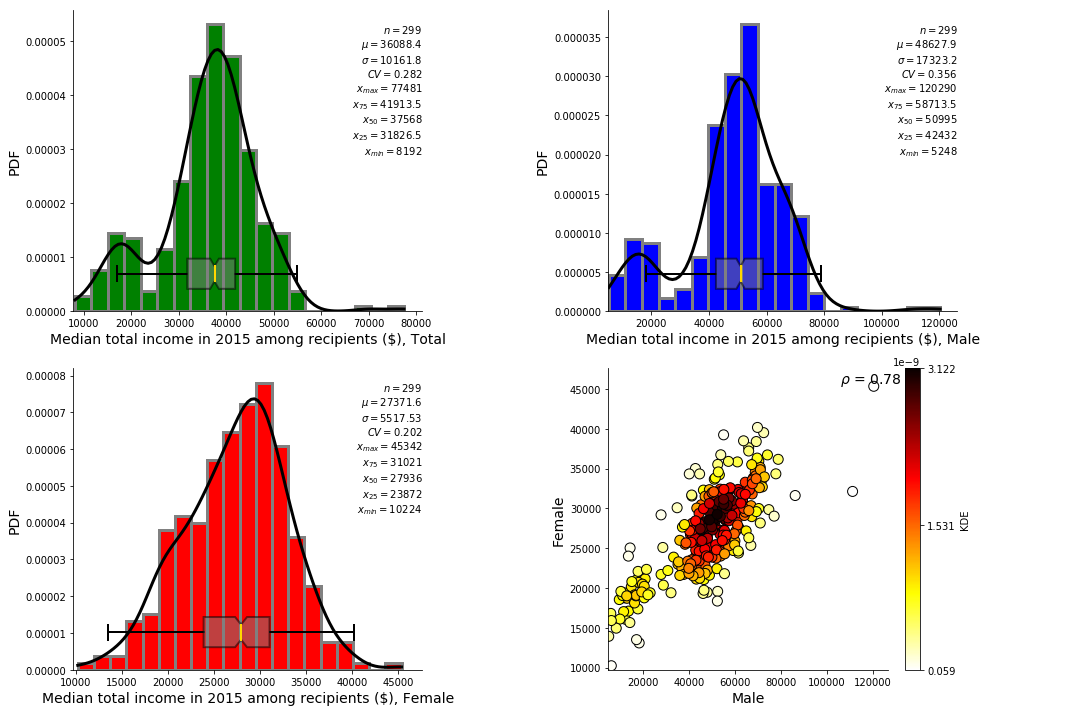

In [25]:
ss.summary_stat(df_CSD,663,outfl=True)

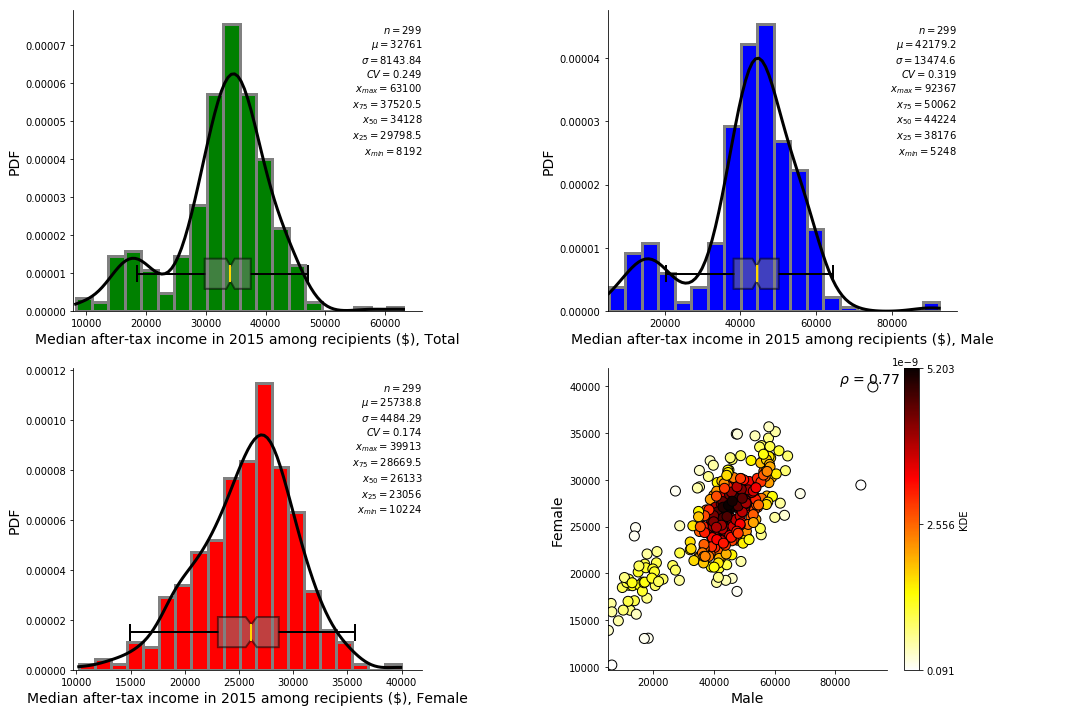

In [26]:
ss.summary_stat(df_CSD,665,outfl=True)

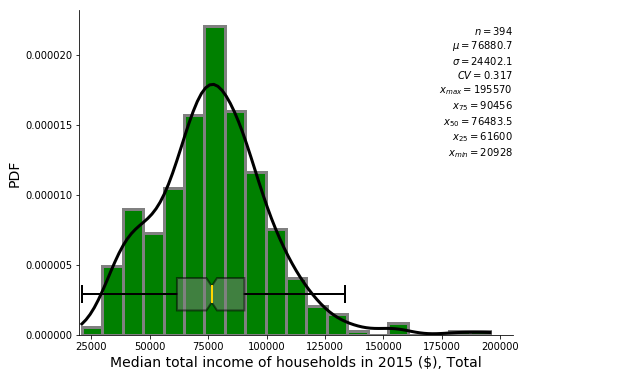

In [27]:
ss.summary_stat(df_CSD, 742,outfl=True)

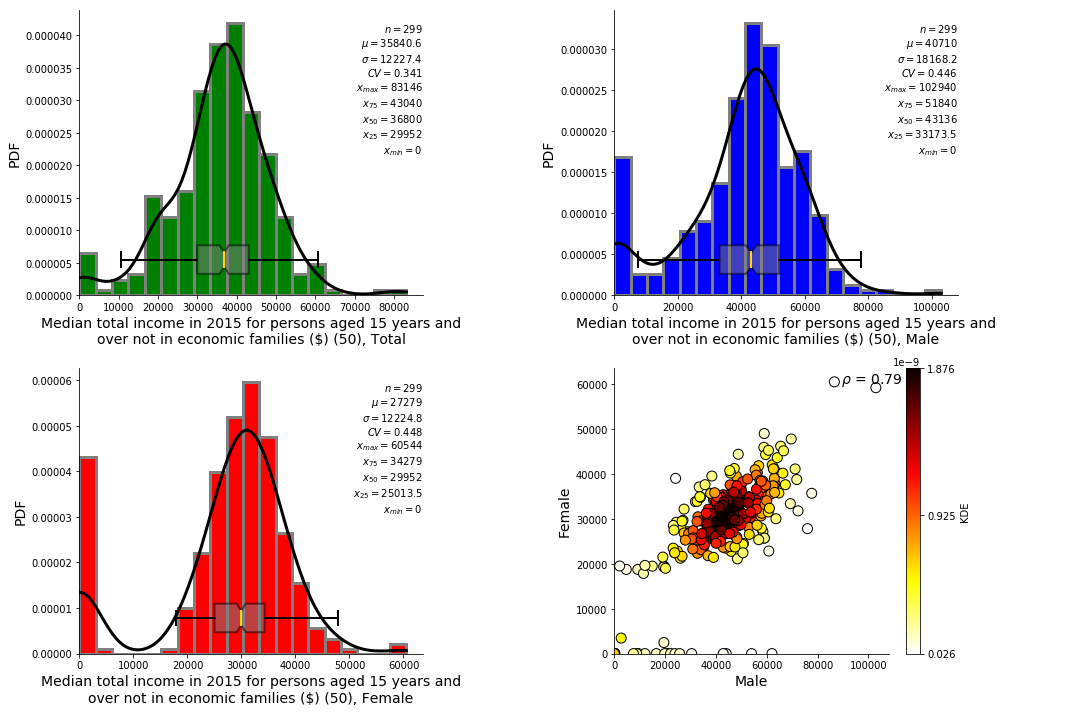

In [28]:
ss.summary_stat(df_CSD, 829,outfl=True)

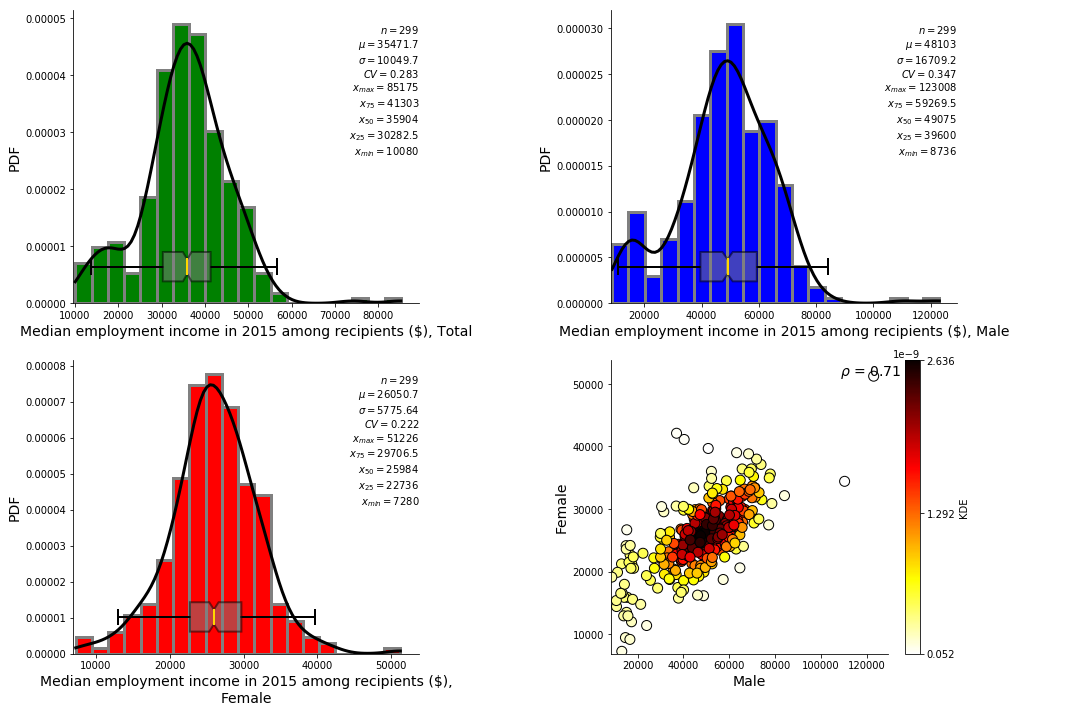

In [29]:
ss.summary_stat(df_CSD, 671,outfl=True)